In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
from pacological.hh import exp, gain
from convenience.numpy import save_hdfz, load_hdfz

def plot_fi(rates, Is, gs, vs, xfactors):
    n_plot = 3

    plt.figure(figsize=(4,12))
    plt.subplot(n_plot, 1, 1)
    plt.plot(Is, rates[:,0], label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, rates[:,1], label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, rates[:,2], label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, rates[:,3], label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, rates[:,4], label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("Firing rate (Hz)")

    plt.subplot(n_plot, 1, 2)
    plt.plot(Is, gs[:,0], label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, gs[:,1], label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, gs[:,2], label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, gs[:,3], label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, gs[:,4], label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("g (nanosiemens)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.subplot(n_plot, 1, 3)
    plt.plot(Is, vs[:,0]*1000, label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, vs[:,1]*1000, label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, vs[:,2]*1000, label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, vs[:,3]*1000, label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, vs[:,4]*1000, label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("Vm (mvolt)")

WARNING    The 'pre' keyword is deprecated, use 'on_pre' instead. [brian2.synapses.synapses.deprecated_pre]
INFO       No numerical integration method specified for group 'neurongroup_1', using method 'linear' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.11s, trying other methods took 0.25s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'linear' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_4', using method 'linear' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongr

-71.8436569965 4.9372063896


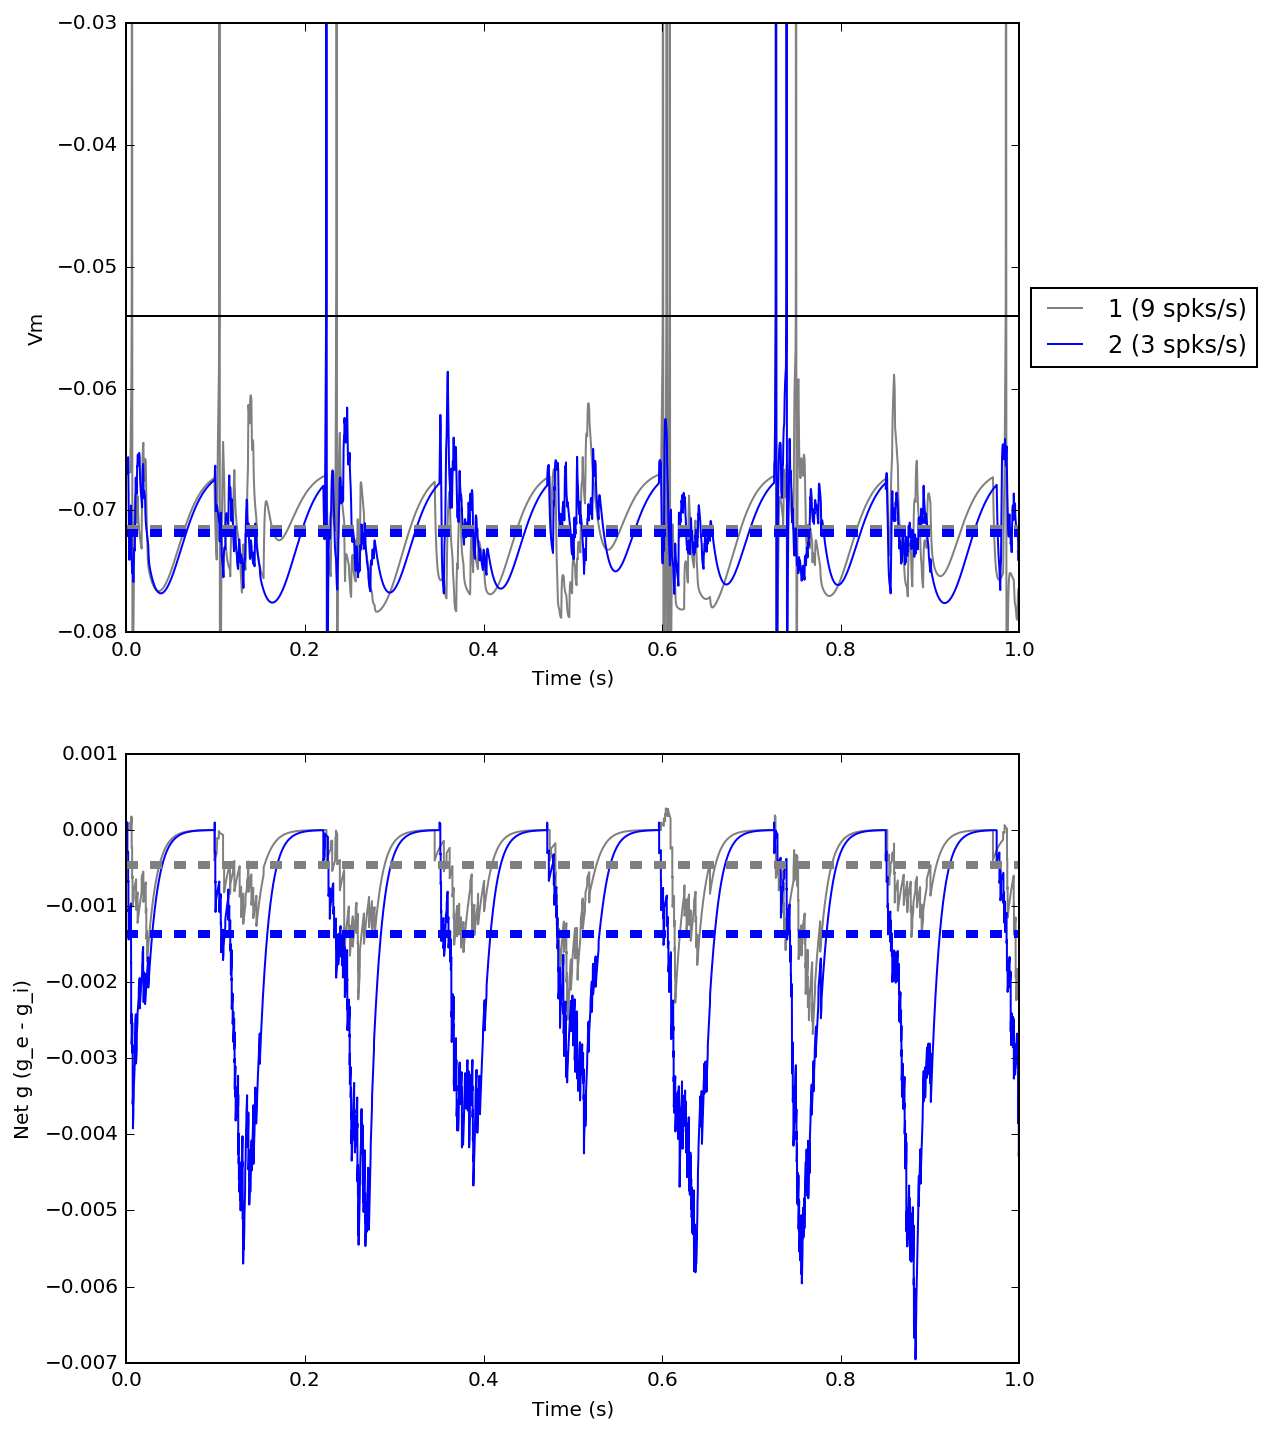

In [2]:
# --
f = 8
I = 0  # 300 
xfactor1 = 1
xfactor2 = 3

# --
t = 1

w = 100
k = 1
r = 400

res1 = exp(t, I, xfactor1, f=f, r=r, w_e=k*w, w_i=k*w*4)
res2 = exp(t, I, xfactor2, f=f, r=r, w_e=k*w, w_i=k*w*4)

# --
spikes1 = res1['spikes']
traces1 = res1['traces']
spikes2 = res2['spikes']
traces2 = res2['traces']

M_v1 = np.mean(traces1.V_[0])
SD_v1 = np.std(traces1.V_[0])

tot_g1 = traces1.g_e_[0] - traces1.g_i_[0]
rate1 = spikes1.t_[:].shape[0] / t

tot_g2 = traces2.g_e_[0] - traces2.g_i_[0]
rate2 = spikes2.t_[:].shape[0] / t

voltages = traces2.V_[0]
M_v2 = np.mean(voltages)
SD_v2 = np.std(voltages)
print M_v2 * 1000, SD_v2 * 1000

# --
n_plot = 2
plt.figure(figsize=(8, 12))
plt.subplot(n_plot, 1, 1)
plt.plot(traces1.t_, traces1.V_[0], 'grey', label='1 ({} spks/s)'.format(rate1))
plt.plot(traces2.t_, traces2.V_[0], 'blue', label='2 ({} spks/s)'.format(rate2))
plt.axhline(y=-0.054, color='k')
plt.axhline(y=np.mean(traces1.V_[0]), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(traces2.V_[0]), color='blue', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylim(-0.08, -.030)
plt.ylabel('Vm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(n_plot, 1, 2)
plt.plot(traces1.t_, tot_g1, 'grey', label='1')
plt.plot(traces2.t_, tot_g2, 'blue', label='2')
plt.axhline(y=np.mean(tot_g1), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(tot_g2), color='blue', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Net g (g_e - g_i)')

# Classic balance

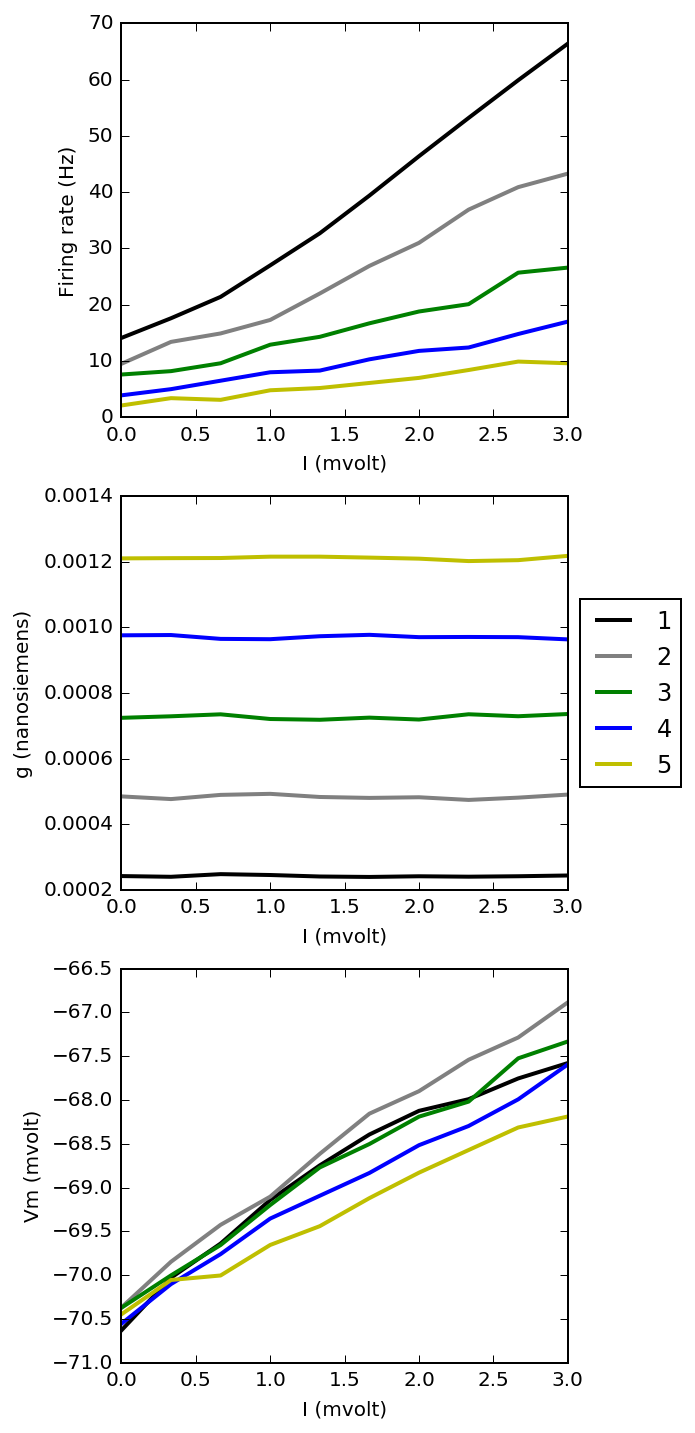

In [3]:
dat = load_hdfz('../data/exp214/classic.hdf5')
rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
xfactors = dat['xfactors']

plot_fi(rates, Is, gs, vs, xfactors)

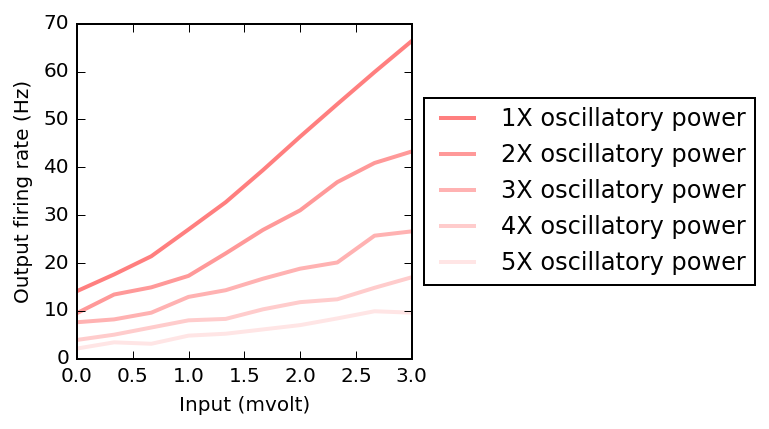

In [4]:
# --
# Plot
plt.figure(figsize=(3,3))

ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        Is, rates[:, j], 
        label='{}X oscillatory power'.format(xf), 
        color='r', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Input (mvolt)")
plt.ylabel("Output firing rate (Hz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Excess re

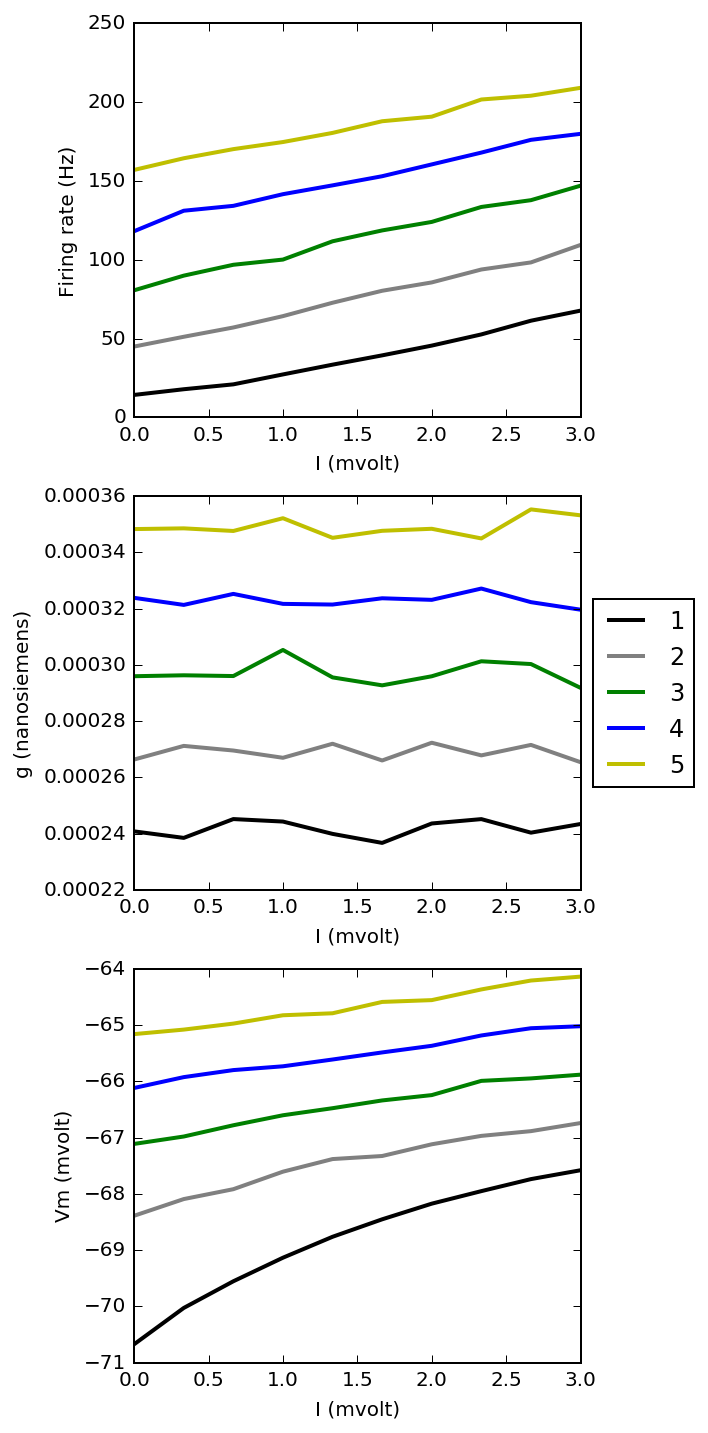

In [5]:
dat = load_hdfz('../data/exp215/re.hdf5')
rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
xfactors = dat['xfactors']

plot_fi(rates, Is, gs, vs, xfactors)

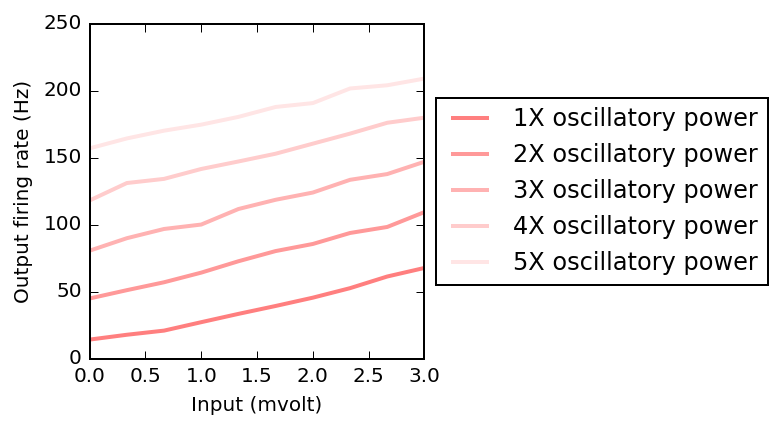

In [6]:
# --
# Plot
plt.figure(figsize=(3,3))

ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        Is, rates[:, j], 
        label='{}X oscillatory power'.format(xf), 
        color='r', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Input (mvolt)")
plt.ylabel("Output firing rate (Hz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Excess ri

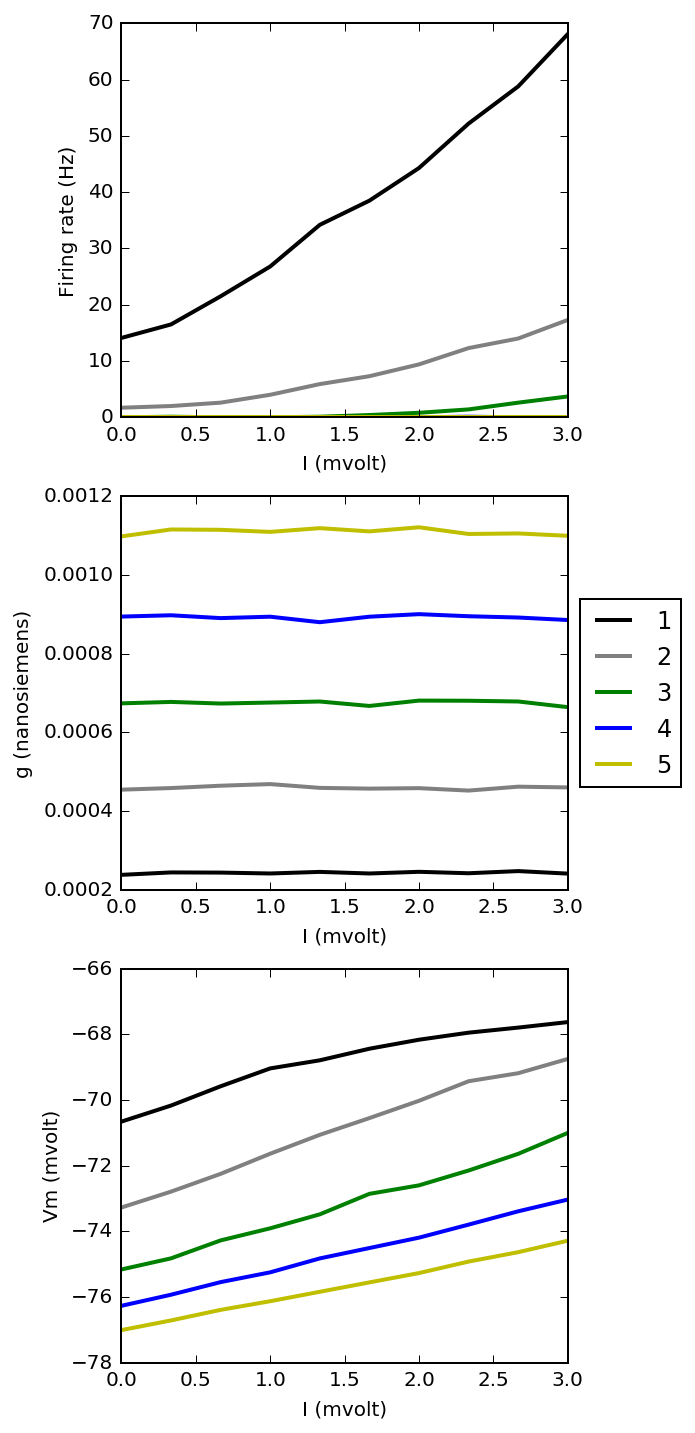

In [7]:
dat = load_hdfz('../data/exp216/ri.hdf5')
rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
xfactors = dat['xfactors']

plot_fi(rates, Is, gs, vs, xfactors)

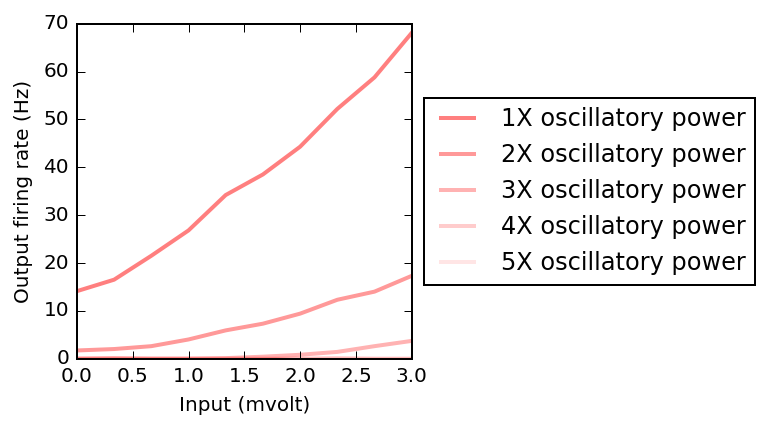

In [8]:
# --
# Plot
plt.figure(figsize=(3,3))

ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        Is, rates[:, j], 
        label='{}X oscillatory power'.format(xf), 
        color='r', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Input (mvolt)")
plt.ylabel("Output firing rate (Hz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Balanced, excess re, and ri all look well behaved.
* Excepting a minor point in balanced. It fires with no I. 

# Balanced model with varying oscillation frequency.

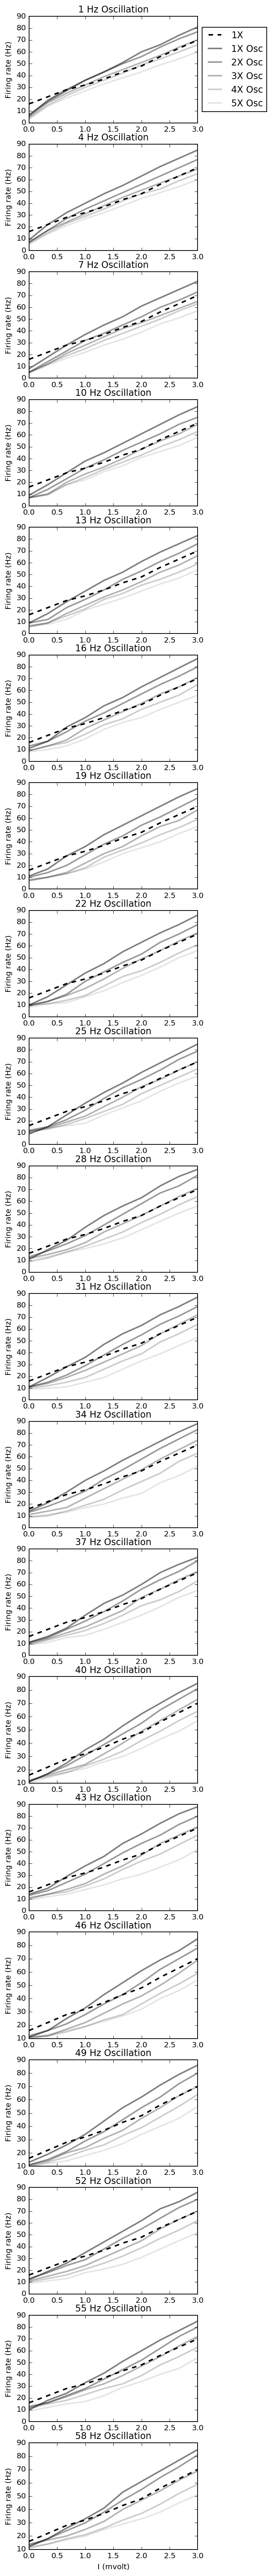

In [9]:
freqs = range(1, 60, 3)
xfactors = [1, 2, 3, 4, 5]

# --
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights
n_plot = len(freqs) + 1

plt.figure(figsize=(4,3*n_plot))

for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp217/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    plt.subplot(n_plot, 1, i+1)
    plt.plot(Is, rates[:, 0], label='{}X'.format(
            xfactors[0]), color='k', linestyle='--', linewidth=2)
    for j, xf in enumerate(xfactors):
        plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
                xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
    plt.ylabel("Firing rate (Hz)")
    plt.title('{} Hz Oscillation'.format(f))

    if (i + 1) == 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.xlabel("I (mvolt)")

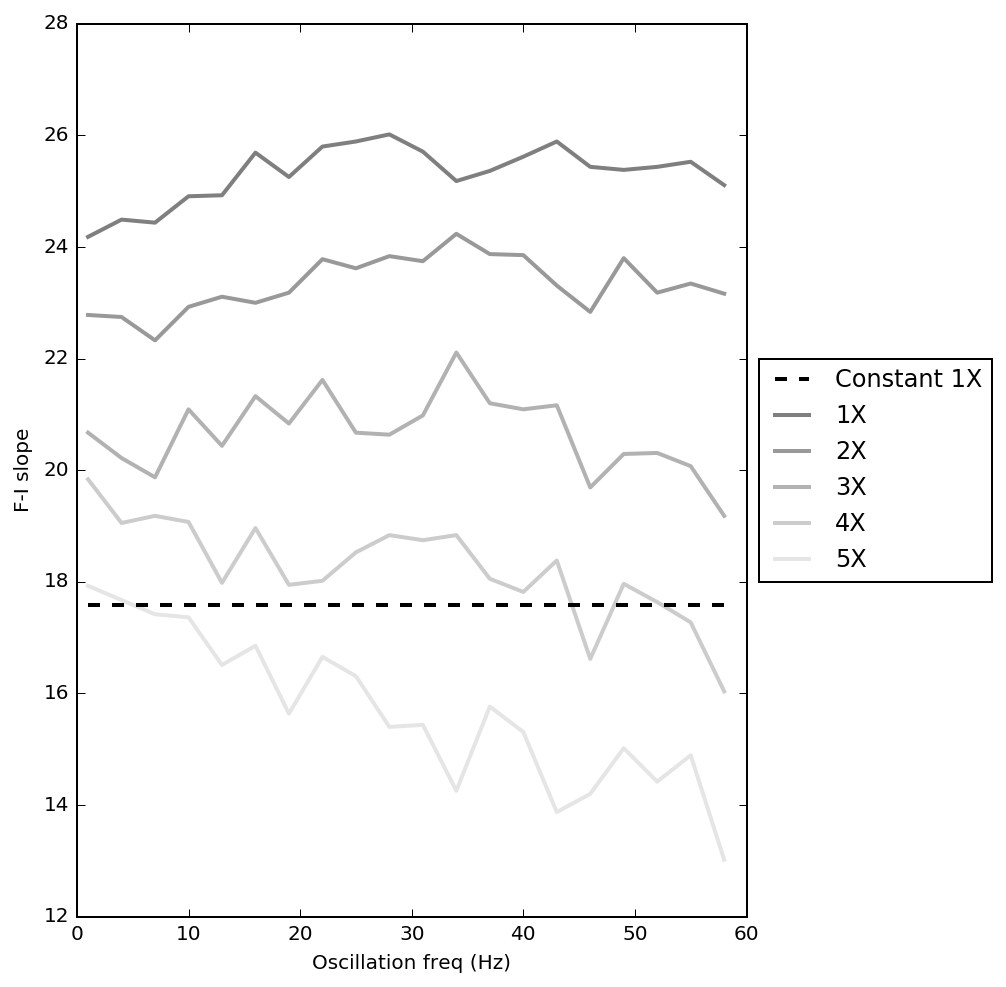

In [10]:
freqs = range(1, 60, 3)
xfactors = [1, 2, 3, 4, 5]

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp217/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 1)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Reduced variance by 10

    * Exp218
   
Oscillations at 10, and 40 Hz only (to save on run time)


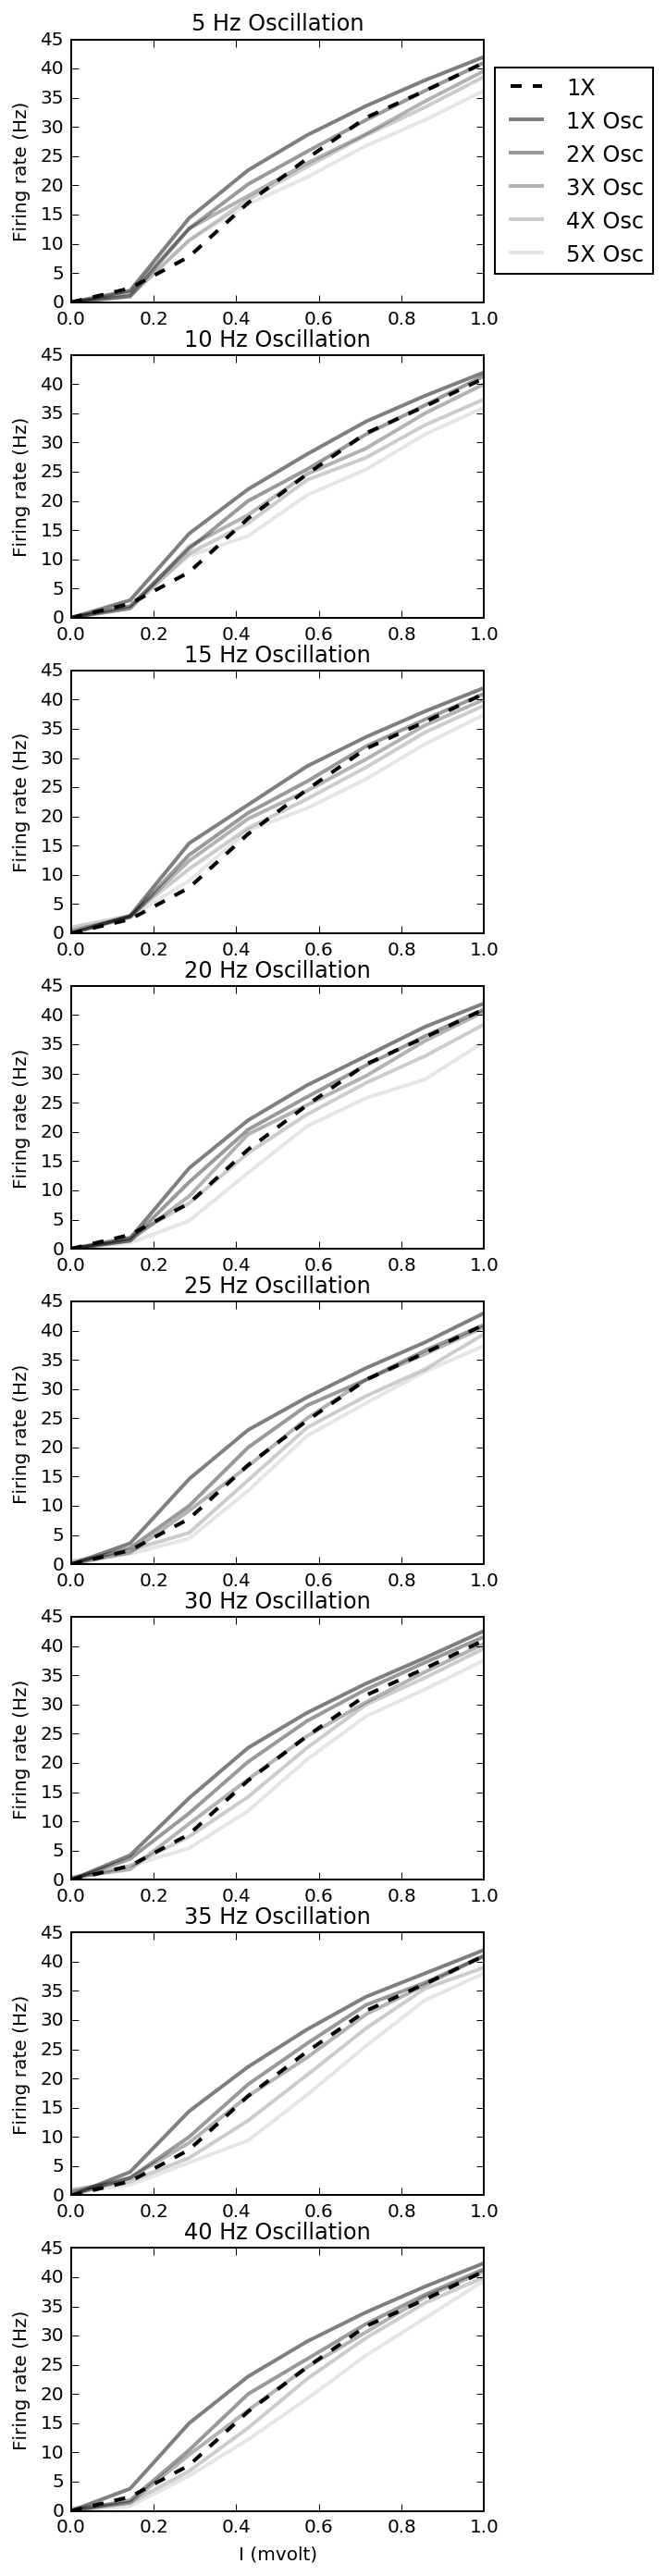

In [11]:
freqs = [5, 10, 15, 20, 25, 30, 35, 40]
xfactors = [1, 2, 3, 4, 5]

# --
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights
n_plot = len(freqs) + 1

plt.figure(figsize=(4,3*n_plot))

for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp218/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    plt.subplot(n_plot, 1, i+1)
    plt.plot(Is, rates[:, 0], label='{}X'.format(
            xfactors[0]), color='k', linestyle='--', linewidth=2)
    for j, xf in enumerate(xfactors):
        plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
                xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
    plt.ylabel("Firing rate (Hz)")
    plt.title('{} Hz Oscillation'.format(f))

    if (i + 1) == 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.xlabel("I (mvolt)")

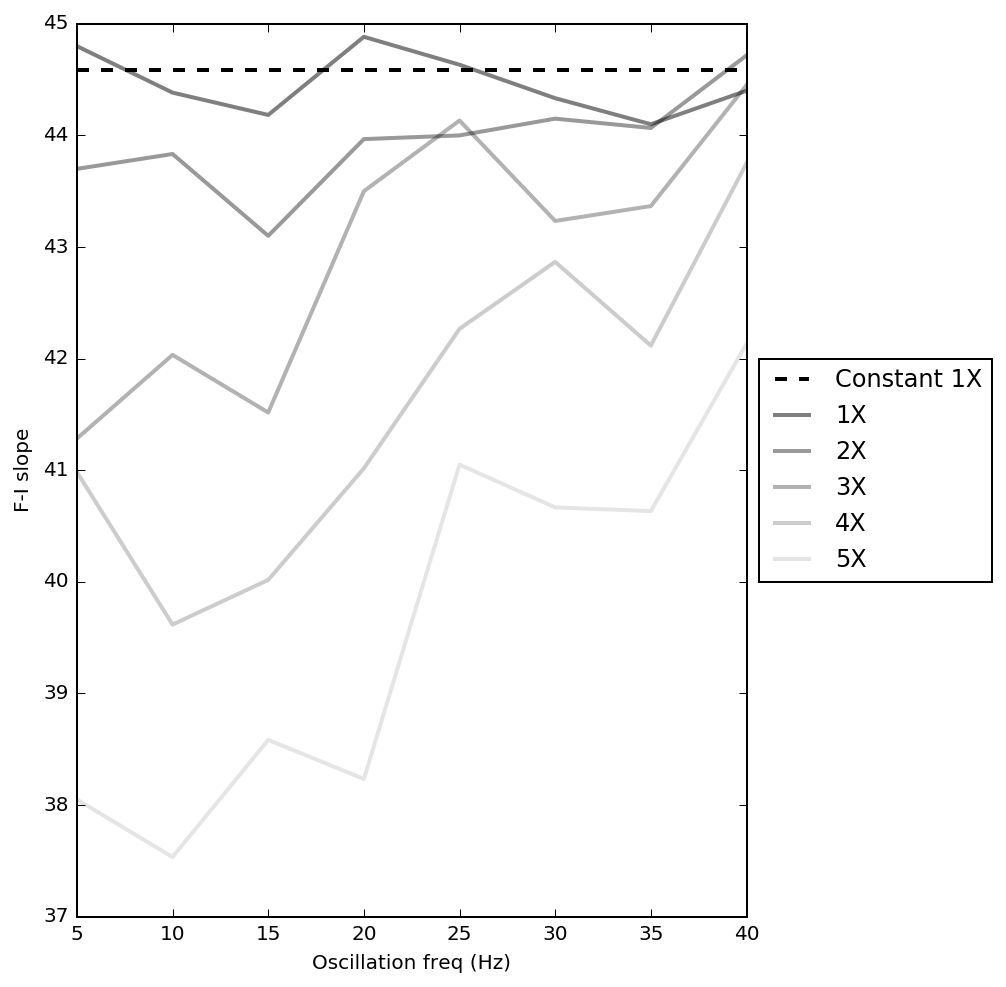

In [12]:
freqs = [5, 10, 15, 20, 25, 30, 35, 40]
xfactors = [1, 2, 3, 4, 5]

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp218/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 1)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Reduced variance by 2

    * Exp219
   
Oscillations at 10, and 40 Hz only (to save on run time)

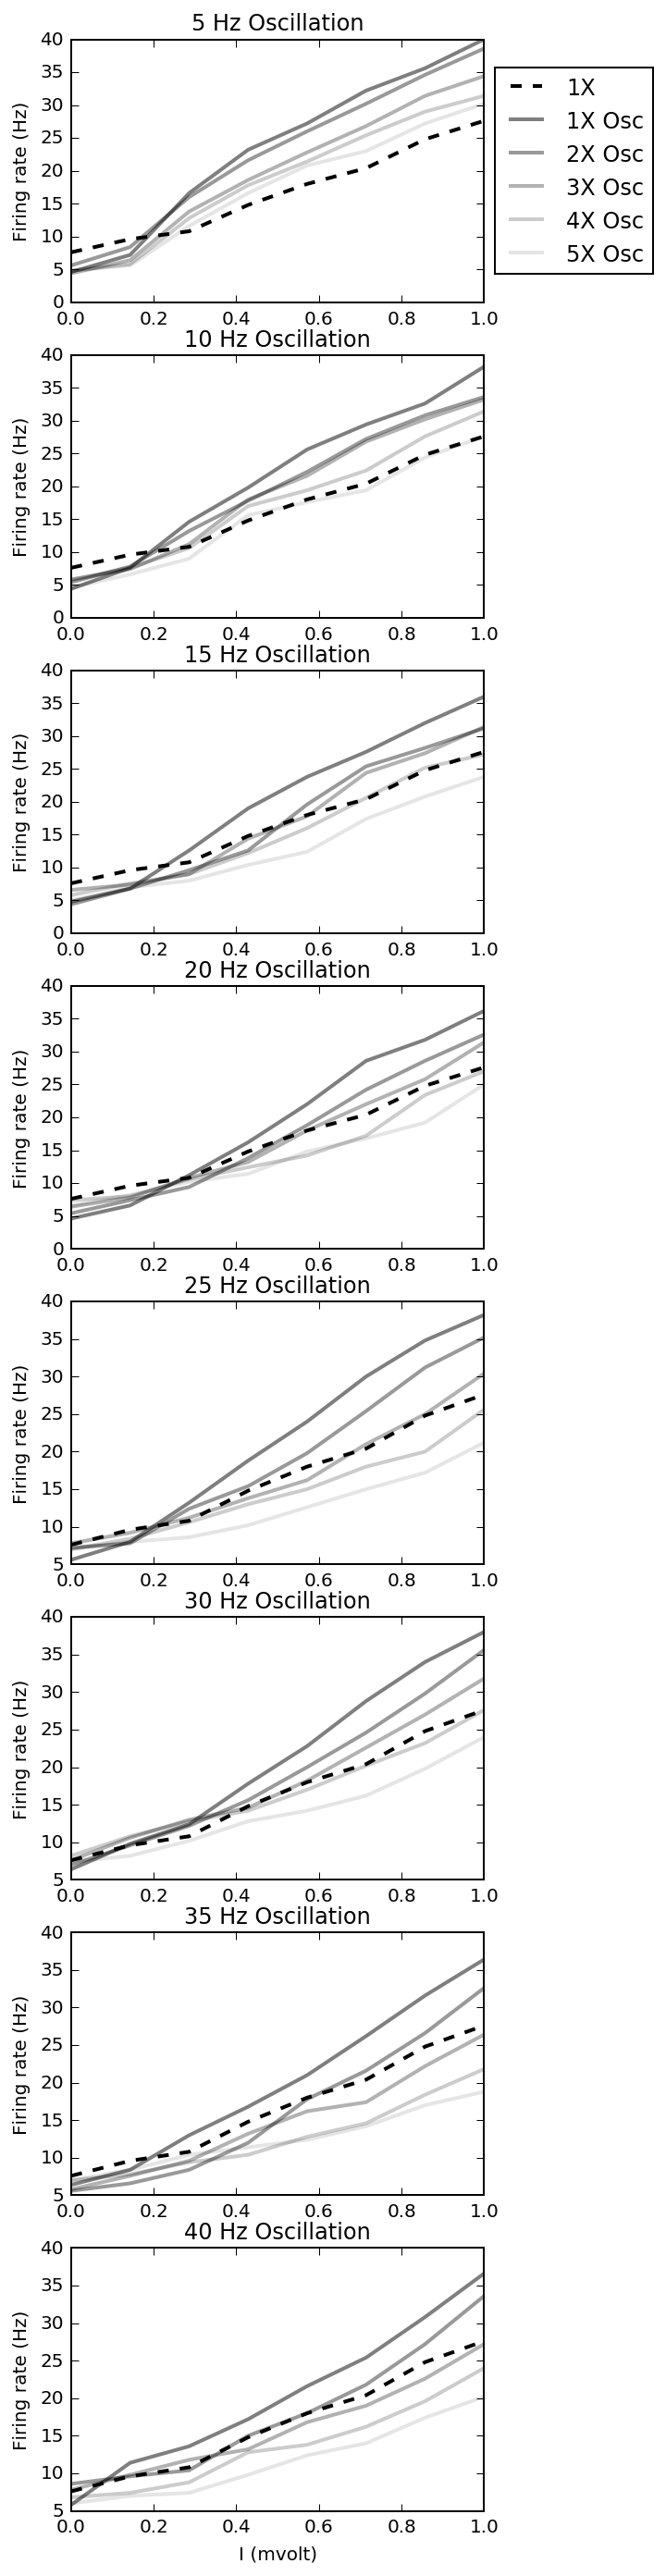

In [13]:
freqs = [5, 10, 15, 20, 25, 30, 35, 40]
xfactors = [1, 2, 3, 4, 5]

# --
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights
n_plot = len(freqs) + 1

plt.figure(figsize=(4,3*n_plot))

for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp219/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    plt.subplot(n_plot, 1, i+1)
    plt.plot(Is, rates[:, 0], label='{}X'.format(
            xfactors[0]), color='k', linestyle='--', linewidth=2)
    for j, xf in enumerate(xfactors):
        plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
                xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
    plt.ylabel("Firing rate (Hz)")
    plt.title('{} Hz Oscillation'.format(f))

    if (i + 1) == 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.xlabel("I (mvolt)")

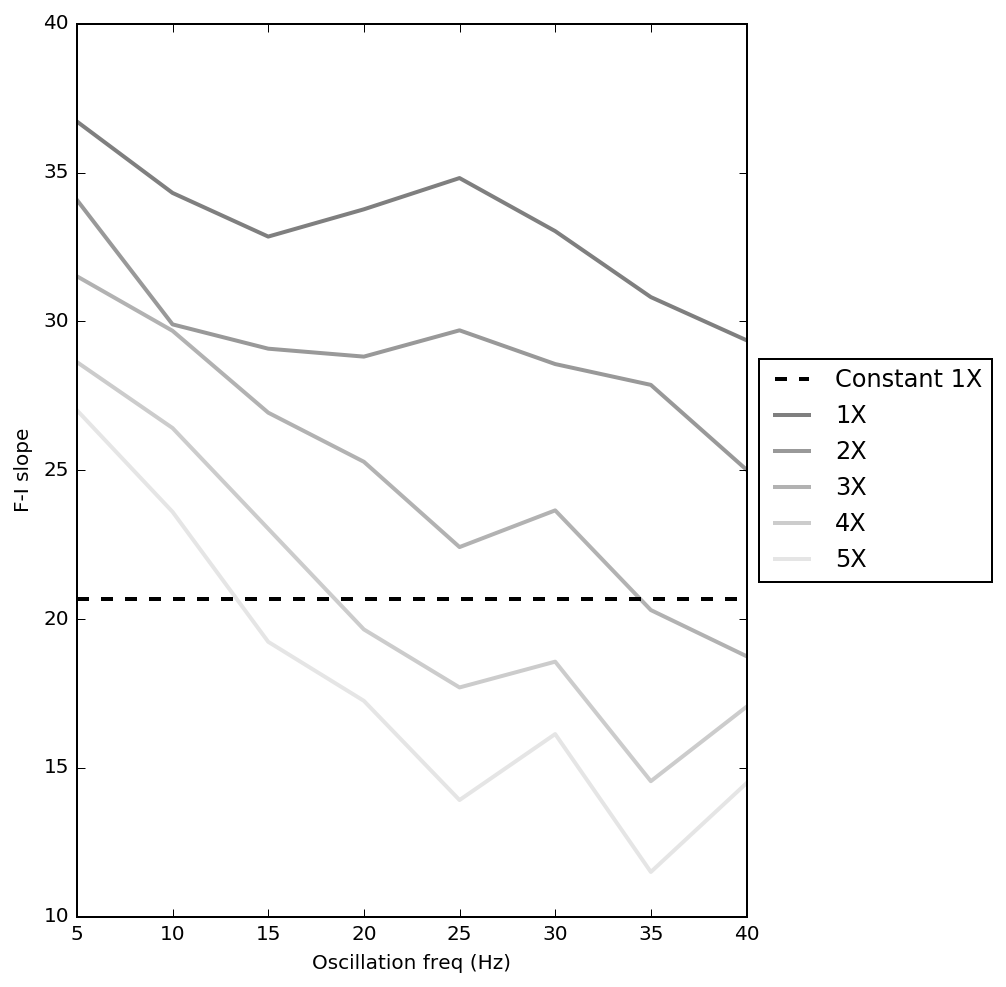

In [14]:
freqs = [5, 10, 15, 20, 25, 30, 35, 40]
xfactors = [1, 2, 3, 4, 5]

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp219/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 1)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Retuned model, variance and resting potential

- Exp220

15 not found
20 not found
25 not found
30 not found
35 not found


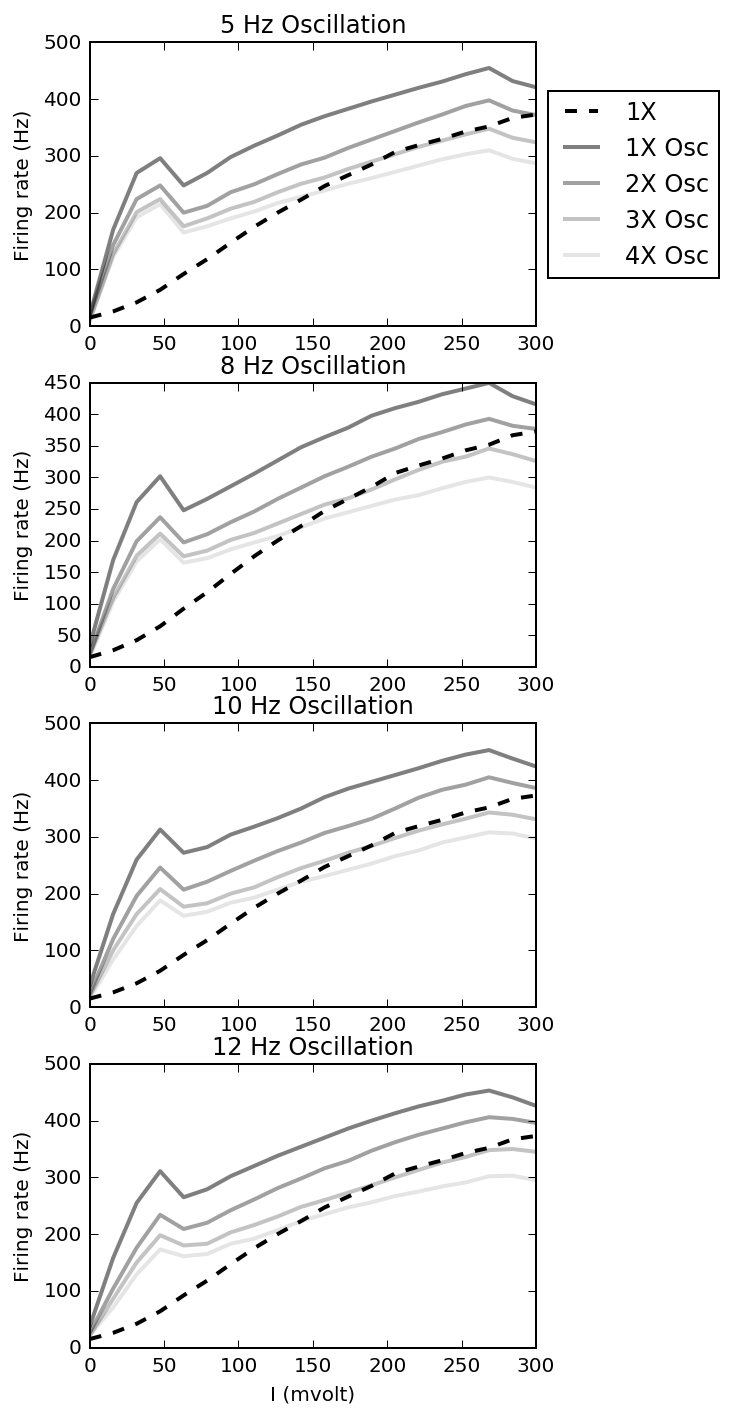

In [15]:
freqs = [5, 8, 10, 12, 15, 20, 25, 30, 35]
xfactors = [1, 2, 3, 4]

# --
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights
n_plot = len(freqs) + 1

plt.figure(figsize=(4,3*n_plot))

for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp220/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    plt.subplot(n_plot, 1, i+1)
    plt.plot(Is, rates[:, 0], label='{}X'.format(
            xfactors[0]), color='k', linestyle='--', linewidth=2)
    for j, xf in enumerate(xfactors):
        plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
                xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
    plt.ylabel("Firing rate (Hz)")
    plt.title('{} Hz Oscillation'.format(f))

    if (i + 1) == 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.xlabel("I (mvolt)")

In [16]:
freqs = [5, 10, 15, 20, 25, 30, 35]
xfactors = [1, 2, 3, 4]

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp220/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']

    mask = rates[:, j] < 100  # Fit only the first part
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is[mask], rates[mask, j], 1)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ValueError: On entry to DGELSD parameter number 4 had an illegal value

- Exp222, smaller Is range than 220 (and this one was run to conclusion).

In [ ]:
freqs = [5, 8, 10, 12, 15, 20, 25, 30, 35]
xfactors = [1, 2, 3, 4]

# --
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights
n_plot = len(freqs) + 1

plt.figure(figsize=(4,3*n_plot))

for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp222/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    plt.subplot(n_plot, 1, i+1)
    plt.plot(Is, rates[:, 0], label='{}X'.format(
            xfactors[0]), color='k', linestyle='--', linewidth=2)
    for j, xf in enumerate(xfactors):
        plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
                xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
    plt.ylabel("Firing rate (Hz)")
    plt.title('{} Hz Oscillation'.format(f))

    if (i + 1) == 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.xlabel("I (mvolt)")

In [ ]:
freqs = [5, 10, 15, 20, 25, 30, 35]
xfactors = [1, 2, 3, 4]

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp222/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']

    mask = rates[:, j] < 100  # Fit only the first part
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is[mask], rates[mask, j], 1)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Exp223, rescaling of 222
- Halving 1X (to 200 Hz)

In [ ]:
freqs = [5, 8, 10, 12, 15, 20, 25, 30, 35]
xfactors = [1, 2, 3, 4]

# --
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights
n_plot = len(freqs) + 1

plt.figure(figsize=(4,3*n_plot))

for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp223/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    plt.subplot(n_plot, 1, i+1)
    plt.plot(Is, rates[:, 0], label='{}X'.format(
            xfactors[0]), color='k', linestyle='--', linewidth=2)
    for j, xf in enumerate(xfactors):
        plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
                xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
    plt.ylabel("Firing rate (Hz)")
    plt.title('{} Hz Oscillation'.format(f))

    if (i + 1) == 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.xlabel("I (mvolt)")

In [ ]:
freqs = [5, 10, 15, 20, 25, 30, 35]
xfactors = [1, 2, 3, 4]

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp223/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']

    mask = rates[:, j] < 100  # Fit only the first part
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is[mask], rates[mask, j], 1)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- 223 (with its halved background) is very similar to 222 BUT the 1X condition has a more shallow decline with oscillation frequency. 
- The slope, X, and frequency relation observed here was also present in the LIF system suggesting the two cases are similar, as expected. 
- With the exception that the HH neuron needs doubled or quadrupled background to give similar gain properties.